Following: https://github.com/AIBiology/Jupyter_Content/blob/main/ZZ_older_notebooks/Decision_Trees.ipynb by Matt Gitzendanner

Using Tensorflow-2.4.1 on HiPerGator

In [1]:
##import all packages
%matplotlib inline
import numpy as np
import pandas as pd
import plotnine as pn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn import metrics


In [2]:
# Load the leaf data
df= pd.read_csv('01-leaf_traditional_descriptors.csv')
df


,img,id,rep,leafNum,morphotype,morphotpe_Num,pheno,area,circularity,convexity,solidity,width,length,aspect_ratio
0,B_oleracea129_A_0_p0_mask,129,A,2,alboglabra,1,leafy,279446.0,48.925596,0.743907,0.735855,462.168810,1284.963834,0.359675
1,B_oleracea129_A_1_p1_mask,129,A,3,alboglabra,1,leafy,337145.5,41.938678,0.784499,0.770115,503.065127,1367.548415,0.367859
2,B_oleracea129_A_2_p2_mask,129,A,4,alboglabra,1,leafy,242170.5,38.802509,0.784663,0.778726,432.822275,1117.606781,0.387276
3,B_oleracea129_B_0_p0_mask,129,B,2,alboglabra,1,leafy,195548.5,46.409848,0.799352,0.716393,401.195141,1110.188851,0.361376
4,B_oleracea129_B_1_p1_mask,129,B,3,alboglabra,1,leafy,271529.5,47.963858,0.749349,0.754199,452.888092,1250.563292,0.362147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,B_oleracea194_C_1_p1_mask,194,C,3,viridis,22,leafy,1164087.5,30.312443,0.774609,0.816740,1183.139673,1885.871846,0.627370
2498,B_oleracea194_C_2_p2_mask,194,C,4,viridis,22,leafy,979769.0,32.210772,0.787263,0.806401,1042.935460,1806.928829,0.577187
2499,B_oleracea194_D_0_p0_mask,194,D,2,viridis,22,leafy,961482.5,28.263872,0.759816,0.856197,1023.086166,1661.395621,0.615799
2500,B_oleracea194_D_1_p1_mask,194,D,3,viridis,22,leafy,1529759.5,30.854931,0.749902,0.830479,1329.148207,2122.032277,0.626356


In [3]:
df.drop(df[df['morphotype'] == 'rupestris'].index, inplace = True)
df.drop(df[df['morphotype'] == 'villosa'].index, inplace = True)
df.drop(df[df['morphotype'] == 'insularis'].index, inplace = True)
df.drop(df[df['morphotype'] == 'incana'].index, inplace = True)
df.drop(df[df['morphotype'] == 'cretica'].index, inplace = True)
df.drop(df[df['morphotype'] == 'oleracea'].index, inplace = True)
df.drop(df[df['morphotype'] == 'montana'].index, inplace = True)
df.drop(df[df['morphotype'] == 'hilarionis'].index, inplace = True)
df.drop(df[df['morphotype'] == 'macrocarpa'].index, inplace = True)

In [4]:
df['morphotype'].value_counts()

alboglabra    240
italica       230
botrytis      199
viridis       191
gemmifera     188
gongylodes    172
capitata      170
ramosa        157
medullosa     146
sabellica     138
palmifolia    124
costata       115
sabauda        42
Name: morphotype, dtype: int64

In [5]:
## set up variables for decision tree
X = df.drop(columns=['img', 'id', 'rep', 'leafNum', 'morphotype', 'morphotpe_Num', 'pheno'])
y = df['morphotype']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = Pipeline([ 
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier())
])

model.fit(X_train, y_train)


(1478, 7) (634, 7) (1478,) (634,)


Pipeline(steps=[('scaler', StandardScaler()),
                ('tree', DecisionTreeClassifier())])

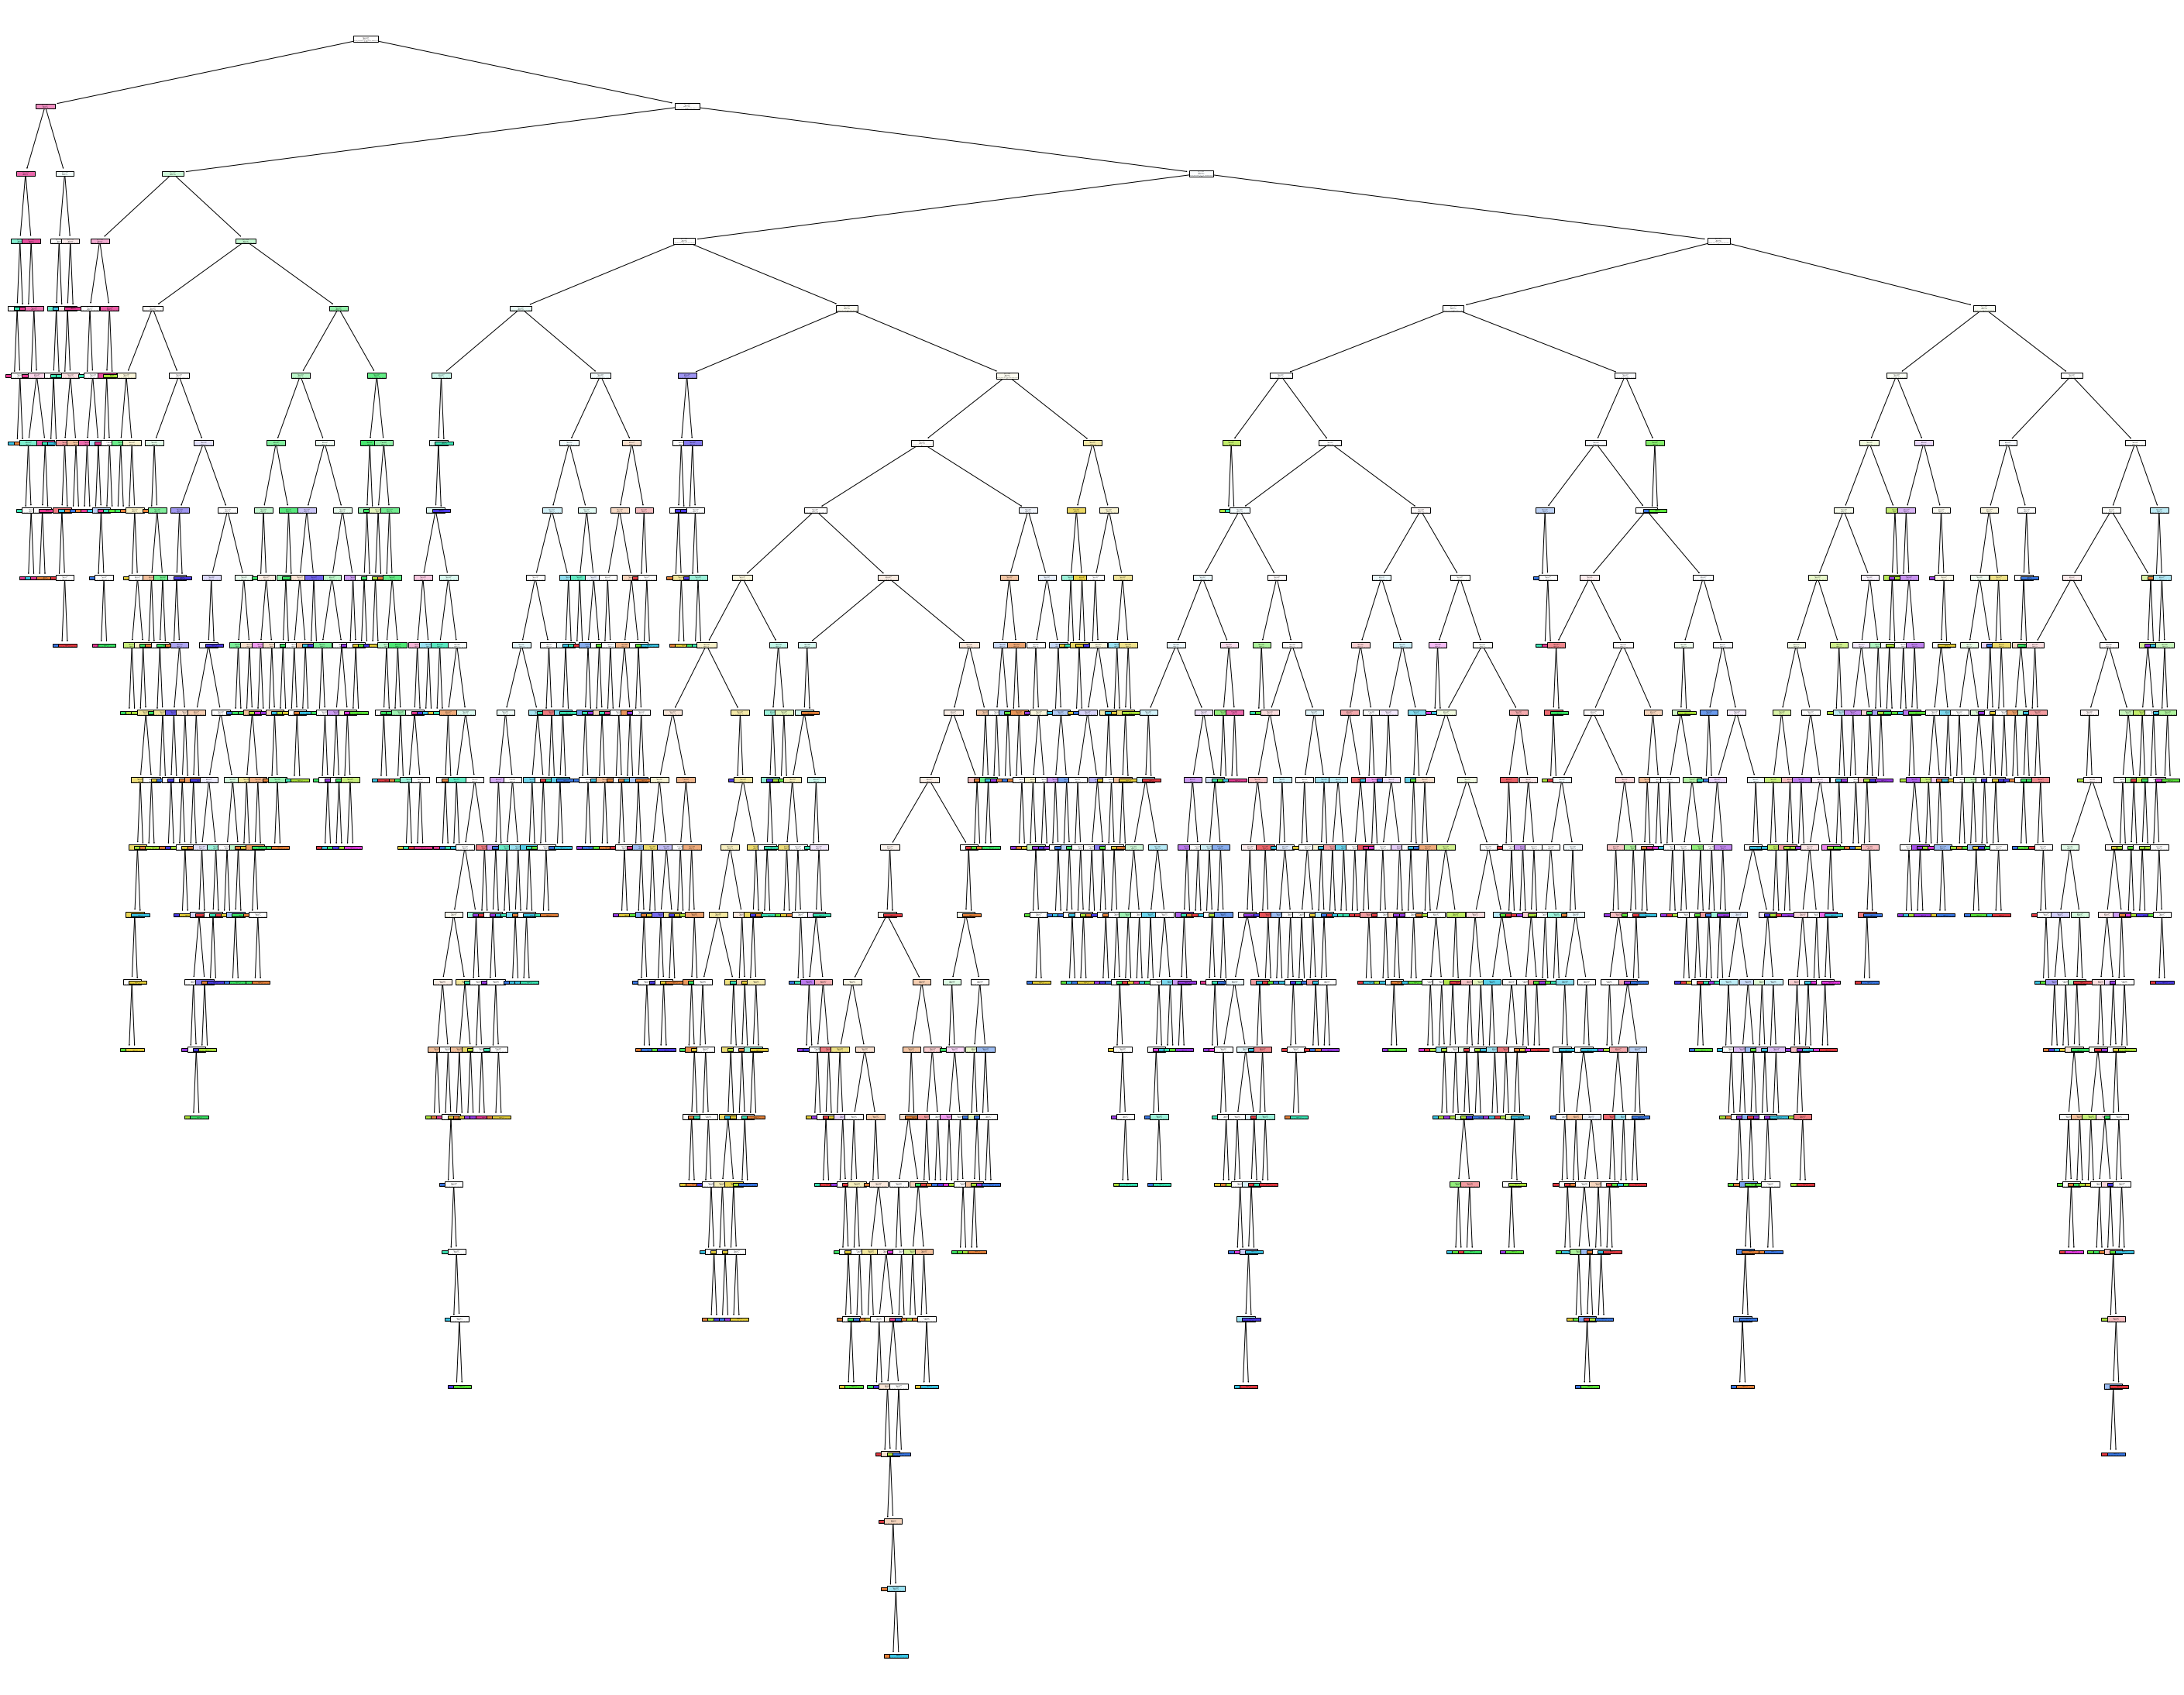

In [6]:
# Visualize the tree using plot_tree
fig = plt.figure(figsize=(50,40))
annotations = plot_tree(model['tree'], filled=True) # Assign text annotations to variable to not print

In [15]:
# helper function to plot confusion matrices from https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial?scriptVersionId=66335932
classes = ['alboglabra', 'italica', 'botrytis', 'viridis', 'gemmifera', 'gongylodes', 
           'capitata', 'ramosa', 'medullosa', 'sabellica', 'palmifolia', 'costata', 'sabauda']

def plot_confusionmatrix(y_train,y_train_pred,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train,y_train_pred)
    
    df_confusion = pd.DataFrame(cf, index = classes, columns=classes)
    df_confusion['TOTAL'] = df_confusion.sum(axis=1)

    # get percentages
    df_percentages = df_confusion.div(df_confusion.TOTAL, axis=0)
    df_percentages = df_percentages.drop('TOTAL', axis=1)    
    
    #cmap = sns.color_palette("Dark2", as_cmap=True)
    cmap = sns.light_palette("#1b9e77", as_cmap=True)
    #sns.heatmap(cf,annot=True,yticklabels=classes, 
    #            xticklabels=classes, cmap=cmap, fmt = '.1%')
    sns.heatmap(df_percentages,annot=True,yticklabels=classes, 
                xticklabels=classes, cmap=cmap, fmt='0.1%')
    plt.tight_layout()
    plt.rcParams["figure.figsize"] = (10,10)
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.show()

Train score 1.0
Test score 0.27287066246056785
Train Confusion matrix


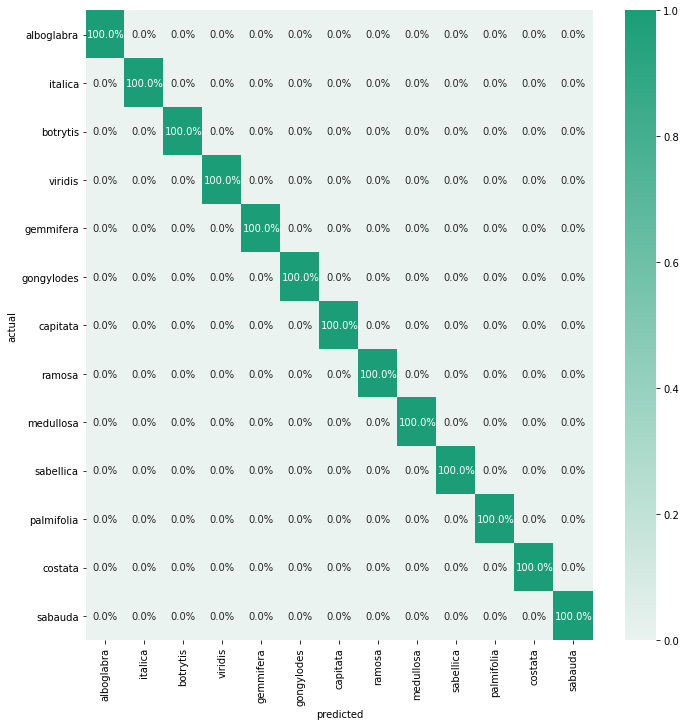

Test Confusion matrix


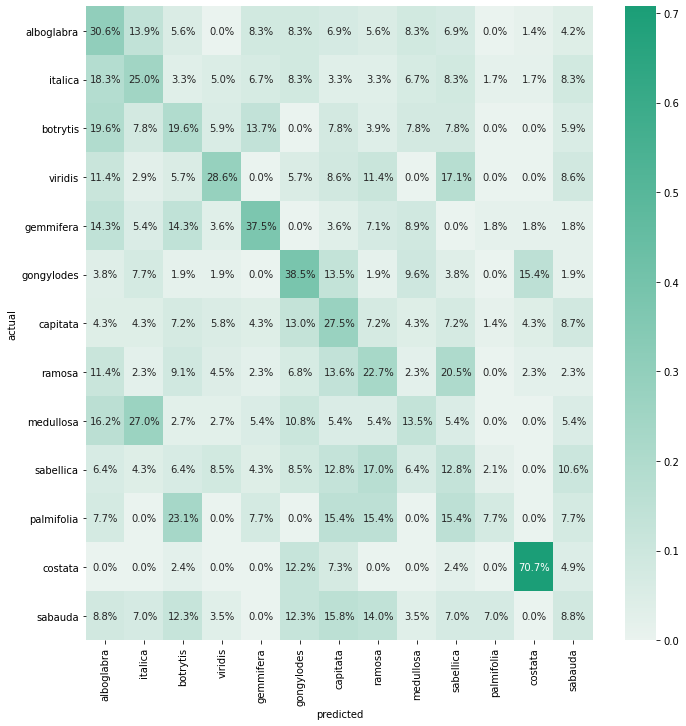

In [16]:
##accuracy for trainning and testing
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

plot_confusionmatrix(y_train,y_train_pred,dom='Train')
plot_confusionmatrix(y_test,y_test_pred,dom='Test')

In [17]:
##model above is overfit, therefore we use purning to prevent this
##finding best alpha (the learning rate)
path = model['tree'].cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00045106 0.00050744 0.00050744 0.00050744 0.00050744
 0.00054127 0.00054127 0.00054127 0.00054127 0.00054127 0.00056382
 0.00056382 0.00056382 0.00057993 0.00057993 0.00057993 0.00057993
 0.00057993 0.00057993 0.00058433 0.00059202 0.00059202 0.00059202
 0.00060141 0.00061508 0.00061508 0.00061508 0.00062454 0.00067659
 0.00067659 0.00067659 0.00067659 0.00067659 0.00067659 0.00067659
 0.00067659 0.00067659 0.00067659 0.00067659 0.00067659 0.00067659
 0.00067659 0.00067659 0.00067659 0.00067659 0.00067659 0.00067659
 0.00067659 0.00067659 0.00067659 0.00067659 0.00067659 0.00067659
 0.00067659 0.00067659 0.00067659 0.00067659 0.00067659 0.00067659
 0.00067659 0.00067659 0.00067659 0.00067659 0.00067659 0.00067659
 0.00067659 0.00067659 0.00067659 0.00067659 0.00067659 0.00067659
 0.00067659 0.00067659 0.00067659 0.00067659 0.00067659 0.00067659
 0.00067659 0.00067659 0.00067659 0.00067659 0.00067659 0.00067659
 0.00067659 0.00067659 0.00067659 0.00067659 0.00067659 0.0006

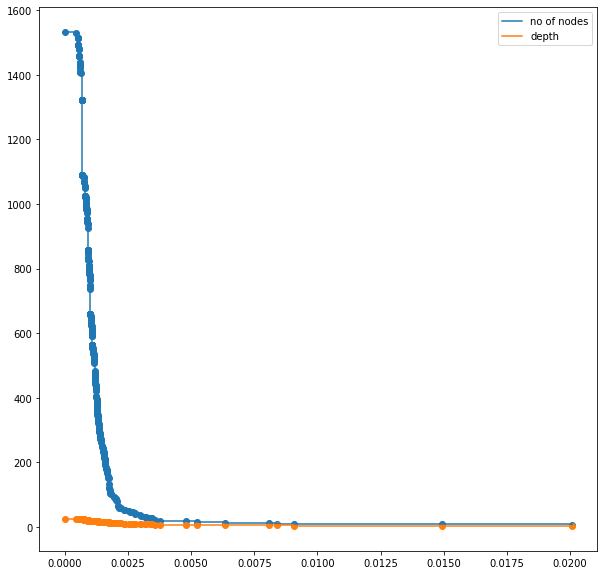

In [18]:
# For each alpha we will append our model to a list and plot it against depth of tree
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

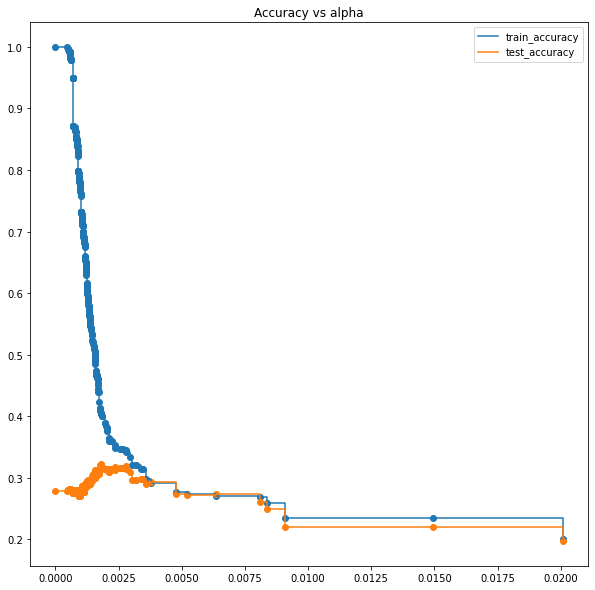

Best accuracy of 0.3217665615141956 obtained at alpha 0.0018042399639152016


In [19]:
## check out accuracy vs alpha to find best alpha
train_acc = []
test_acc = []
best_acc=0
best_alpha=0
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))
    if accuracy_score(y_test_pred,y_test) > best_acc:
        best_acc=accuracy_score(y_test_pred,y_test)
        best_alpha=c.ccp_alpha

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()
print(f'Best accuracy of {best_acc} obtained at alpha {best_alpha}')

Train score 0.40054127198917455
Test score 0.3186119873817035
Train Confusion matrix


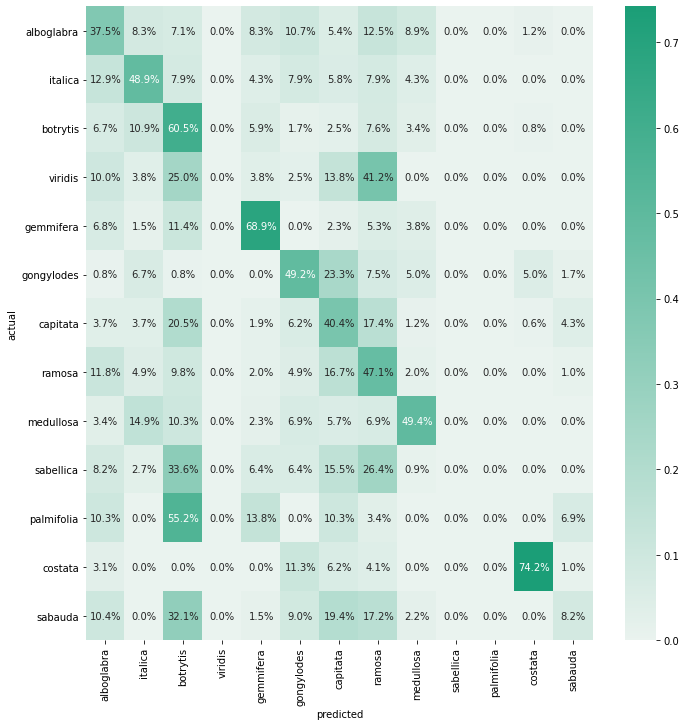

Test Confusion matrix


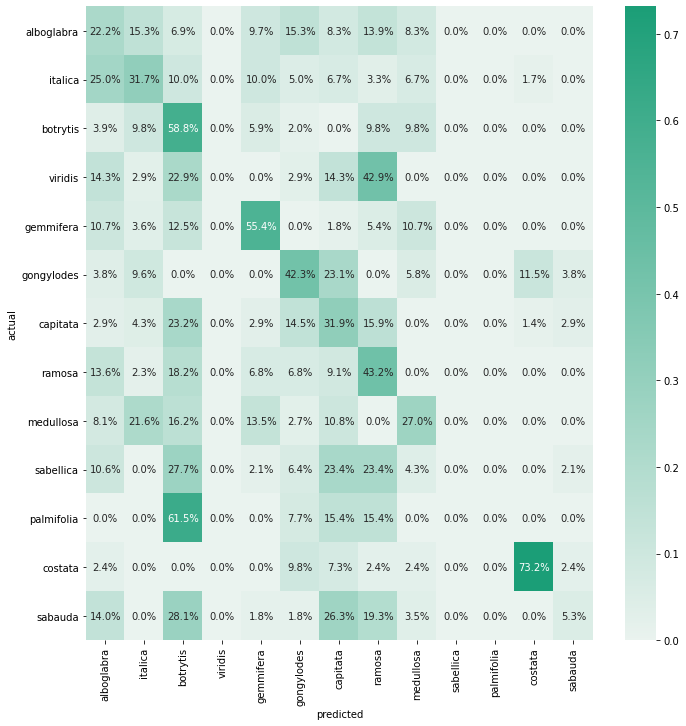

In [23]:
## run decision tree with new paramters
model = Pipeline([ 
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(ccp_alpha=0.0018042399639152016))
])
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

plot_confusionmatrix(y_train,y_train_pred,dom='Train')
plot_confusionmatrix(y_test,y_test_pred,dom='Test')

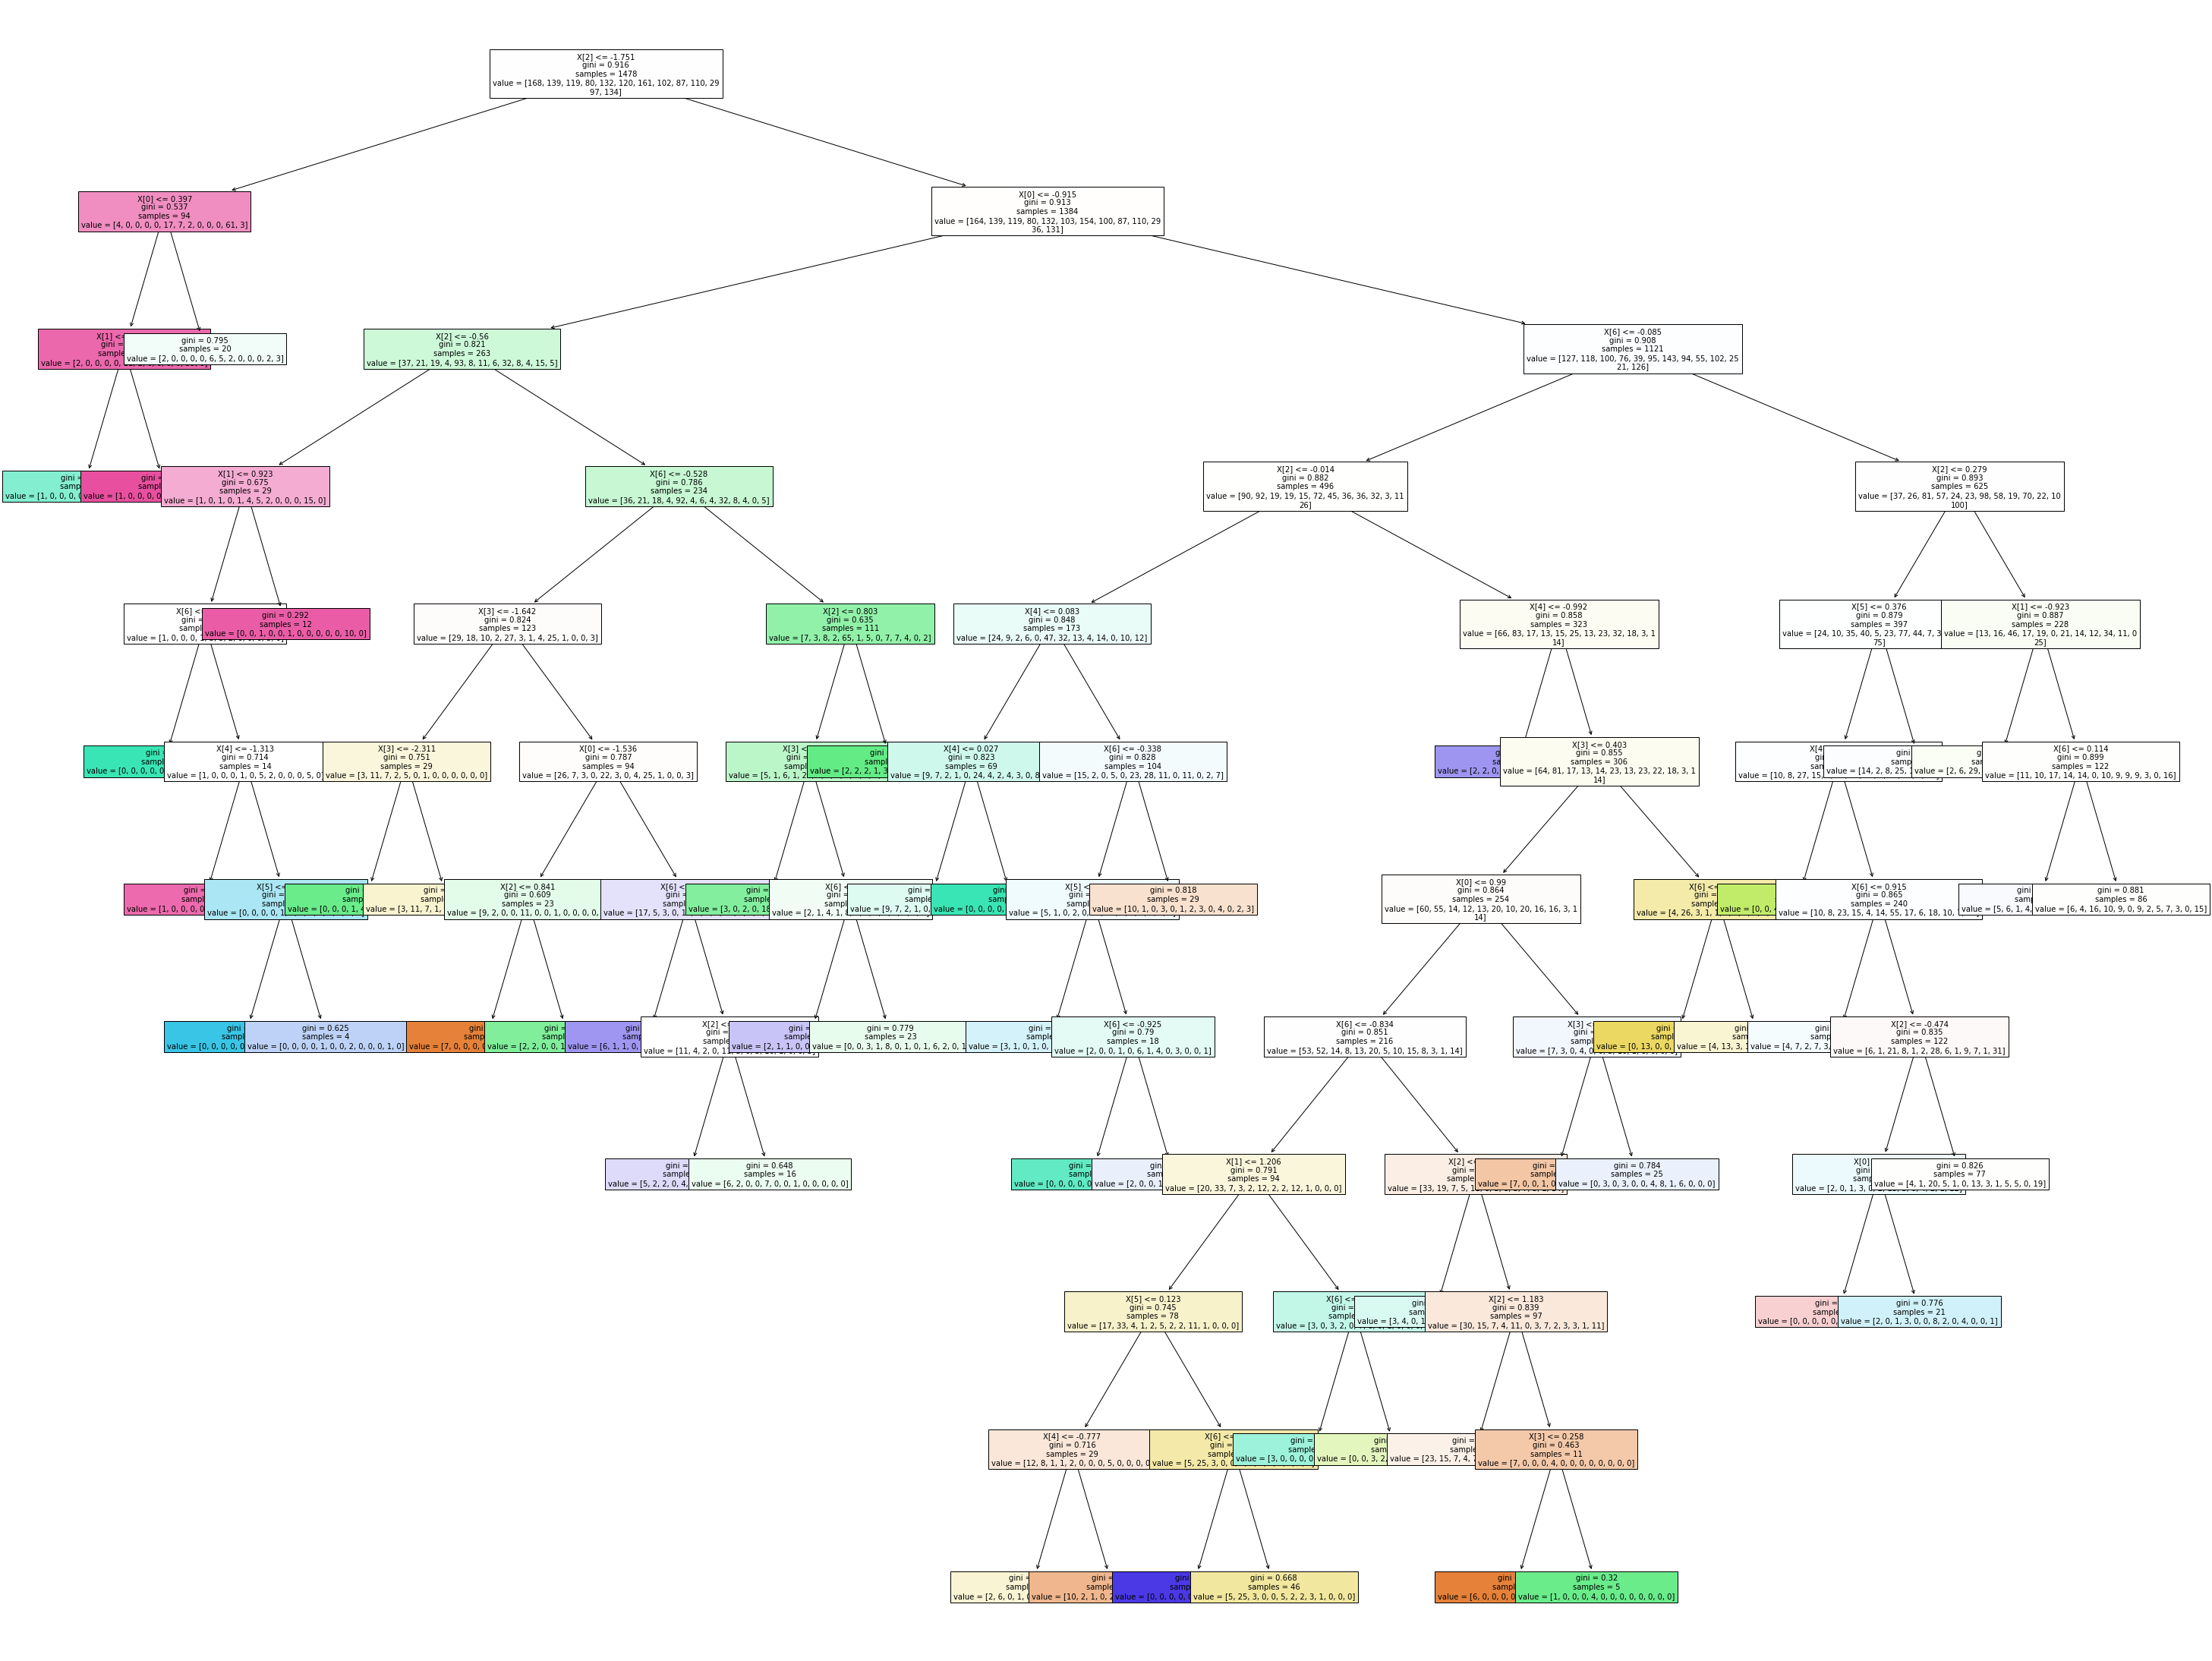

In [24]:
# Visualize the tree using plot_tree
fig = plt.figure(figsize=(50,40))
annotations = plot_tree(model['tree'], filled=True, fontsize=10) # Assign text annotations to variable to not print

In [25]:
# Tune other parameters
params = {'max_depth': [2,4,6,8,10,12,14,16,18,20,22,24], #The maximum depth of the tree
         'min_samples_split': [2,3,4], #The minimum number of samples required to split an internal node
         'min_samples_leaf': [1,2], #The minumum number of samples required to be at a leaf node
         'ccp_alpha': [0.0018042399639152016]}

clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)
print(gcv.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0018042399639152016, max_depth=12,
                       min_samples_leaf=2)


Train score 0.40392422192151556
Test score 0.3217665615141956
Train Confusion matrix


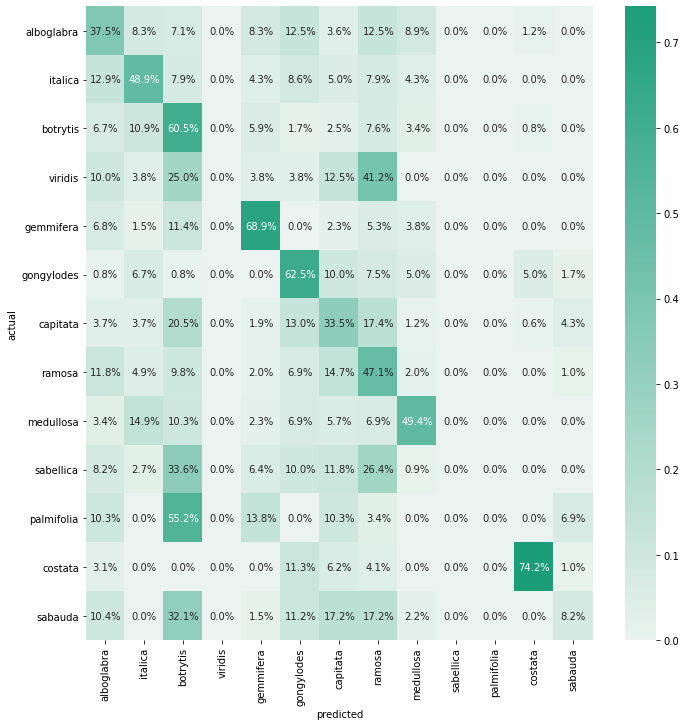

Test Confusion matrix


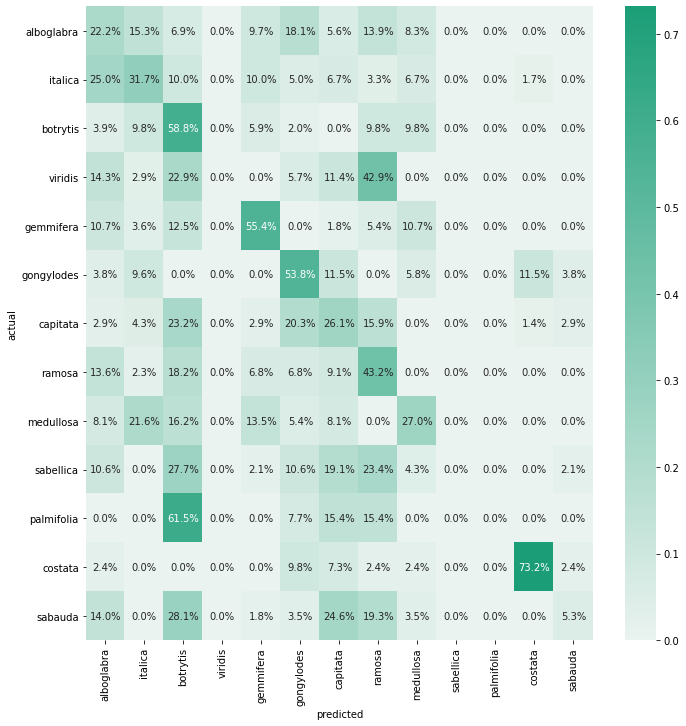

In [26]:
model = gcv.best_estimator_
model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

DT_f1 = plt.figure()
plot_confusionmatrix(y_train,y_train_pred,dom='Train')
DT_f1.savefig("CULTIVAR_DT_train_confusionMatrix.pdf", format='pdf')

DT_f2 = plt.figure()
plot_confusionmatrix(y_test,y_test_pred,dom='Test')
DT_f2.savefig("CULTIVAR_DT_test_confusionMatrix.pdf", format='pdf')

### Random Forests

In [28]:
## set up vairables for random forest

X = df.drop(columns=['img', 'id', 'rep', 'leafNum', 'morphotype', 'morphotpe_Num', 'pheno'])
y = df['morphotype']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)


model_RF = Pipeline([ 
    ('scaler', StandardScaler()),
    ('forest', RandomForestClassifier(n_estimators=10000, ccp_alpha=0.0018042399639152016, max_depth=12, min_samples_split=2)) #best estimator values from above
])

model_RF.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('forest',
                 RandomForestClassifier(ccp_alpha=0.0018042399639152016,
                                        max_depth=12, n_estimators=10000))])

Train score 0.7882273342354533
Test score 0.3359621451104101
Train Confusion matrix


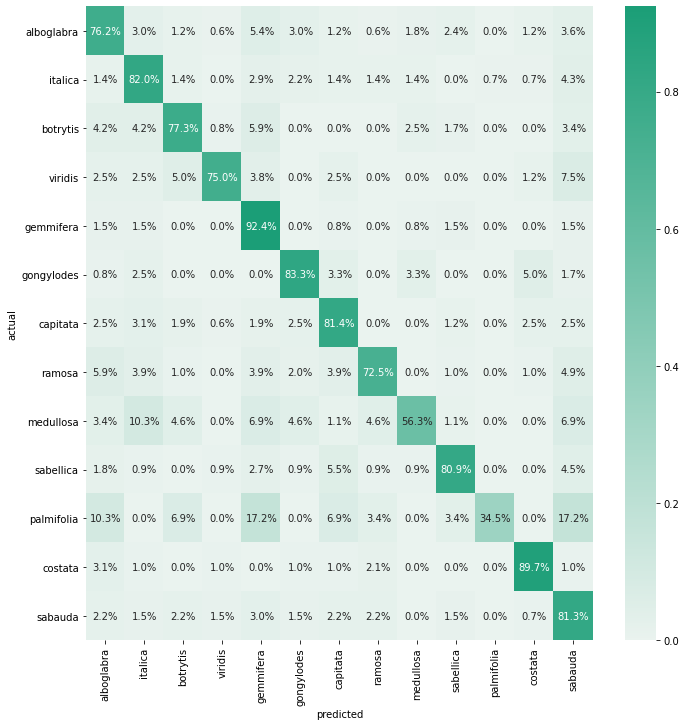

Test Confusion matrix


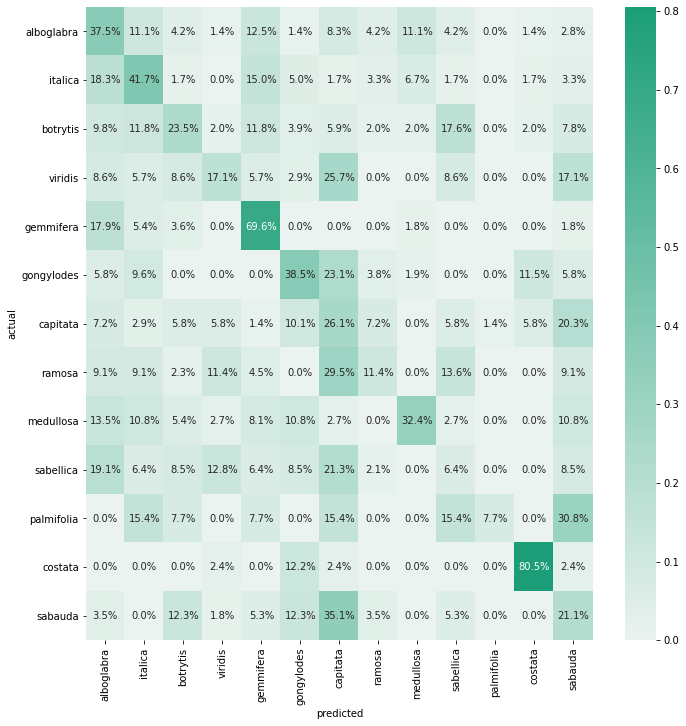

In [29]:
# Get accuracy
y_train_pred = model_RF.predict(X_train)
y_test_pred = model_RF.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

f1 = plt.figure()
plot_confusionmatrix(y_train,y_train_pred,dom='Train')
f1.savefig("CULTIVAR_RF_train_confusionMatrix.pdf", format='pdf')

f2 = plt.figure()
plot_confusionmatrix(y_test,y_test_pred,dom='Test')
f2.savefig("CULTIVAR_RF_test_confusionMatrix.pdf", format='pdf')


In [30]:
#for a good explation of results below: https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
print(metrics.classification_report(y_test_pred, y_test))

              precision    recall  f1-score   support

  alboglabra       0.38      0.32      0.35        84
    botrytis       0.42      0.39      0.40        64
    capitata       0.24      0.30      0.26        40
     costata       0.17      0.23      0.20        26
   gemmifera       0.70      0.50      0.58        78
  gongylodes       0.38      0.37      0.38        54
     italica       0.26      0.19      0.22        96
   medullosa       0.11      0.24      0.15        21
  palmifolia       0.32      0.44      0.38        27
      ramosa       0.06      0.09      0.07        35
     sabauda       0.08      0.50      0.13         2
   sabellica       0.80      0.72      0.76        46
     viridis       0.21      0.20      0.20        61

    accuracy                           0.34       634
   macro avg       0.32      0.34      0.31       634
weighted avg       0.37      0.34      0.35       634



In [31]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model_RF['forest'].feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi

,feature,importance
2,convexity,0.199918
6,aspect_ratio,0.153383
1,circularity,0.142104
4,width,0.132389
0,area,0.129334
5,length,0.123155
3,solidity,0.119718
